In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
import xgboost
from scipy.stats import kurtosis,skew
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.mixture import BayesianGaussianMixture
from sklearn.naive_bayes import GaussianNB
from sklearn.mixture import GaussianMixture
import os
import seaborn as sn
from sklearn.model_selection import train_test_split
from time import time
import tensorflow as tf
from keras.utils import *

Using TensorFlow backend.


In [2]:
TARGET_LABELS = {
    1: "Working at Computer",
    2: "Standing Up, Walking and Going updown stairs",
    3: "Standing",
    4: "Walking",
    5: "Going UpDown Stairs",
    6: "Walking and Talking with Someone",
    7: "Talking while Standing",        
}

In [3]:
#to calculate the mod of a vector
def absoluter(q):
    return np.sqrt((q[0]**2 + q[1]**2 + q[2]**2))

In [174]:
data = {1.0:[],2.0:[],3.0:[],4.0:[],5.0:[],6.0:[],7.0:[]}
a = []
path = "/Volumes/Adithya/Adithya/ML/DATA SETS/Activity Recognition from Single Chest-Mounted Accelerometer/"

In [175]:
def data_extract(string):
    global data,a
    with open(path + string + ".csv",'rU') as f:
        c = csv.reader(f)
        for l in c:
            temp  = list(map(float , l))
            if(temp[4]>0.0):
                a.append((temp[1:]))                        #the first element is serial number of the data
    return        

In [176]:
for i in xrange(1,16):
    data_extract(str(i))


In [190]:
g = np.array([0.0, 0.0, 0.0])
c = np.array(a)
b = c


(1923177, 4)

In [7]:
#normalisation
b = c[:,:-1]
lab = c[:,-1]
m = np.mean(b,axis =0)
v = np.var(b,axis = 0)
b = (b-m)/v
lab = lab.reshape(-1,1)
b = np.hstack((b,lab))

In [10]:

arr=np.zeros((len(b),12))
labels=b[:,-1]

for i in range (0,len(b)):
    g = 0.9*g + 0.1*b[i,:-1]  #low pass filter
    v = b[i,:-1]
    v = v - g   #high pass filter

    for j in xrange(3):
        arr[i,j]=b[i,j]
    arr[i,3]=absoluter(b[i,:-1])
    j=4

    for k in xrange(3):
        arr[i,j+k]=g[k]
    arr[i,7]=absoluter(g)
    j=8

    for k in xrange(3):
        arr[i,j+k]=v[k]
    arr[i,11]=absoluter(v)

arr = np.hstack((arr,labels.reshape(-1,1)))


                                                PICKLE EXTRACTION FROM HERE

In [7]:
#the method must be changed since it is a dictionary now 
def attr_extract():
    global c
    attr_mean = np.mean(arr,axis=0)
    attr_var = np.var(arr,axis=0)
    attr_std = np.std(arr,axis=0)
    return
   

In [8]:
#arr = np.array(b)
arr.shape

(1923177, 4)

In [9]:
start=time()
try:
    del attributes
except NameError:
    attributes = np.zeros((1,21))   #93 originals     #removed fft too
    #attributes = np.array(attributes)
act = []
#act = np.array(act)
l = 0
i=0
t = time()
while i < len(arr):
    print i
    if i+51>len(arr):
        break
    if(arr[i,-1] != arr[i+51,-1]):
        i+=1
        continue
    else:
        attr_mean = np.mean(arr[i:i+52,:-1],axis = 0)
        attr_var = np.var(arr[i:i+52,:-1],axis=0)
        attr_min = np.amin(arr[i:i+52,:-1],axis = 0)
        attr_max = np.amax(arr[i:i+52,:-1],axis = 0)  
        attr_skew = skew(arr[i:i+52,:-1],axis=0)
        attr_kurtosis = kurtosis(arr[i:i+52,:-1],axis=0)
        
        attr_coeff = []
        
        for j in [0]:  #[0,4,8]
            attr_coeff.append(np.corrcoef(arr[i:i+52,j+0],arr[i:i+52,j+1])[1,0])
            attr_coeff.append(np.corrcoef(arr[i:i+52,j+1],arr[i:i+52,j+2])[1,0])
            attr_coeff.append(np.corrcoef(arr[i:i+52,j+2],arr[i:i+52,j+0])[1,0])
        attr_coeff = np.array(attr_coeff)
        
        attr = np.hstack((attr_mean,attr_var))
        attr = np.hstack((attr,attr_min))
        attr = np.hstack((attr,attr_max))
        attr = np.hstack((attr,attr_skew))
        attr = np.hstack((attr,attr_kurtosis))
        attr = np.hstack((attr,attr_coeff))
        
        act.append(arr[i,-1])
    
        attributes = np.vstack((attributes,attr))
        del attr
        i+=26
print time() - start        
start = time()
attributes = np.delete(attributes,0,0)

0
26
52
78
104
130
156
182
208
234
260
286
312
338
364
390
416
442
468
494
520
546
572
598
624
650
676
702
728
754
780
806
832
858
884
910
936
962
988
1014
1040
1066
1092
1118
1144
1170
1196
1222
1248
1274
1300
1326
1352
1378
1404
1430
1456
1482
1508
1534
1560
1586
1612
1638
1664
1690
1716
1742
1768
1794
1820
1846
1872
1898
1924
1950
1976
2002
2028
2054
2080
2106
2132
2158
2184
2210
2236
2262
2288
2314
2340
2366
2392
2418
2444
2470
2496
2522
2548
2574
2600
2626
2652
2678
2704
2730
2756
2782
2808
2834
2860
2886
2912
2938
2964
2990
3016
3042
3068
3094
3120
3146
3172
3198
3224
3250
3276
3302
3328
3354
3380
3406
3432
3458
3484
3510
3536
3562
3588
3614
3640
3666
3692
3718
3744
3770
3796
3822
3848
3874
3900
3926
3952
3978
4004
4030
4056
4082
4108
4134
4160
4186
4212
4238
4264
4290
4316
4342
4368
4394
4420
4446
4472
4498
4524
4550
4576
4602
4628
4654
4680
4706
4732
4758
4784
4810
4836
4862
4888
4914
4940
4966
4992
5018
5044
5070
5096
5122
5148
5174
5200
5226
5252
5278
5304
5330
5356
5382
5408

((73773, 21), 73773)

In [13]:
xyz = act
act = np.array(act)
act = act.reshape(-1,1)


In [16]:
f = pd.read_pickle("/Users/adithya8.0.0/Desktop/Dk/att.pkl")
f = np.array(f)
np.savetxt("/Users/adithya8.0.0/Desktop/Dk/att.txt",f)


/Users/adithya8.0.0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Test score: 0.858870


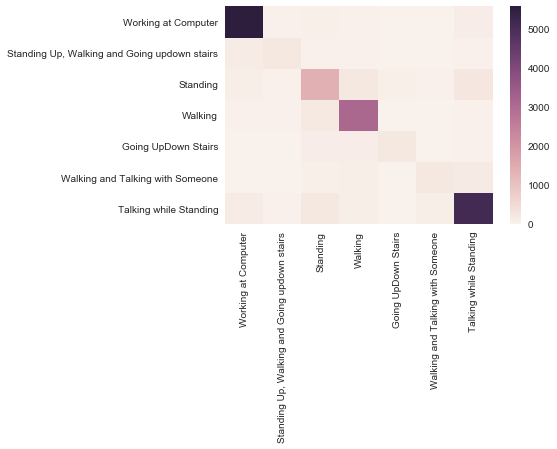

In [47]:
X_train, X_test, y_train, y_test = train_test_split(attributes, act, test_size=0.25,random_state = 0)
rf = RandomForestClassifier(n_estimators=int(np.sqrt(X_train.shape[1]))+1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
labels = list(TARGET_LABELS.values())
sn.heatmap(conf_mat, xticklabels=labels, yticklabels=labels)

test_score = rf.score(X_test, y_test)
print("Test score: %f"%test_score)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(attributes, act, test_size=0.25,random_state = 0)

In [46]:
attributes.shape

(73773, 21)

In [48]:
X_train.shape


(55329, 21)

In [49]:
X_test.shape

(18444, 21)

In [50]:
attributes.shape

(73773, 21)

In [51]:
len(act)


73773

In [52]:
from collections import Counter
c=Counter(xyz)
print c


Counter({1.0: 23389, 7.0: 22809, 4.0: 13710, 3.0: 8270, 5.0: 1959, 2.0: 1821, 6.0: 1815})


In [53]:
for x in conf_mat[np.arange(len(conf_mat)),np.arange(len(conf_mat))]*1.0/np.sum(conf_mat,axis=0):
    print x

0.929178470255
0.620060790274
0.679144385027
0.860209135938
0.650793650794
0.636655948553
0.885803001553


In [54]:
conf_mat[np.arange(len(conf_mat)),np.arange(len(conf_mat))]

array([5576,  204, 1397, 3126,  205,  198, 5135])

In [55]:
conf_mat

array([[5576,   41,   63,   23,    2,    0,  129],
       [ 143,  204,   38,   39,    4,    1,   40],
       [  72,   27, 1397,  206,   58,   28,  260],
       [  37,   24,  175, 3126,   15,    8,   37],
       [  13,    4,   93,   94,  205,    4,   35],
       [  10,    3,   53,   76,   12,  198,  161],
       [ 150,   26,  238,   70,   19,   72, 5135]])

<Container object of 7 artists>

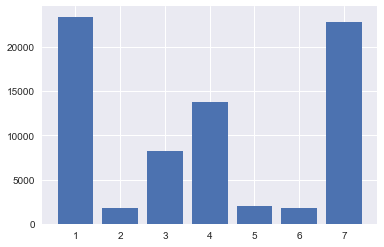

In [56]:
v=c.values()
plt.bar(np.arange(1,8),v)

In [105]:
def efficiency(feats):
    num_est=5
    columns_list=["Mean x","Mean y","Mean z",
              "Dev x","Dev y","Dev z",
              "Corr x-y","Corr x-z","Corr y-z",
              "Min x","Min y","Min z",
             "Max x","Max y","Max z",
             "Skew x","Skew y","Skew z",
             "Kurtosis x", "Kurtosis y","Kurtosis z"]

    print "For Random Forest:"
    y_t = y_train
    #X_train, X_test, y_t, y_test = train_test_split(feats, y_train, test_size=0.25, random_state=0)
    rf=RandomForestClassifier(n_estimators=100,max_features=6,criterion='entropy')
    rf.fit(X_train,y_t)
    
    t1=time()
    print rf.score(X_test,y_test)
    print "Time Taken : " + str(time()-t1)
    
    y_pred = rf.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    importances=rf.feature_importances_
    idx=np.argsort(importances)
    for _n_ in np.array(columns_list)[idx]:
        print _n_
    print
    sn.heatmap(conf_mat)
    
    print "For Decision Trees:"
    d_tree=DecisionTreeClassifier()
    d_tree.fit(X_train,y_t)
    t1=time()
    print d_tree.score(X_test,y_test)
    print "Time Taken : " + str(time()-t1)
    print
    
    print "For SVM:"
    clf=svm.SVC()
    clf.fit(X_train,y_t)
    
    t1=time()
    print clf.score(X_test,y_test)
    print "Time Taken : " + str(time()-t1)
    print
    
    
    print "For Naive bayes:"
    gnb=GaussianNB()
    gnb.fit(X_train,y_t)
    t1=time()
    print gnb.score(X_test,y_test)
    print "Time Taken : " + str(time()-t1)
    print 

    print "For GMM:"
    gmm_=GaussianMixture()
    gmm_.fit(X_train,y_t)
    t1=time()
    res_gmm=gmm_.predict(X_test)
    t2=time()
    print res_gmm,y_test
    print(sum(res_gmm==y_test)*1.0/len(res_gmm))
    print "Time Taken : " + str(t2-t1)
    print 

    print "For Adaboost:"
    ada=AdaBoostClassifier(n_estimators=100,learning_rate=0.001)
    ada.fit(X_train,y_t)
    t1=time()
    print ada.score(X_test,y_test)
    print "Time Taken : " + str(time()-t1)
    print 


    print "For XGboost:"
    xg=xgboost.XGBClassifier(n_estimators=num_est)
    xg.fit(X_train,y_t)

    t1=time()
    print xg.score(X_test,y_test)
    print "Time Taken : " + str(time()-t1)
    print





    

For Random Forest:


/Users/adithya8.0.0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.892322706571
Time Taken : 0.572219848633
Skew z
Max z
Max y
Skew x
Max x
Kurtosis z
Kurtosis x
Skew y
Kurtosis y
Dev x
Dev z
Corr x-y
Min x
Corr x-z
Min y
Mean y
Min z
Corr y-z
Mean x
Mean z
Dev y

For Decision Trees:
0.823194534808
Time Taken : 0.00785803794861

For SVM:
0.509162871394
Time Taken : 39.3143799305

For Naive bayes:
0.486933420082
Time Taken : 0.0437488555908

For GMM:
[0 0 0 ..., 0 0 0] [[ 1.]
 [ 1.]
 [ 1.]
 ..., 
 [ 7.]
 [ 1.]
 [ 1.]]
[ 0.  0.  0. ...,  0.  0.  0.]
Time Taken : 0.0075511932373

For Adaboost:
0.414443721535
Time Taken : 0.480875968933

For XGboost:
0.65761223162
Time Taken : 0.0412240028381



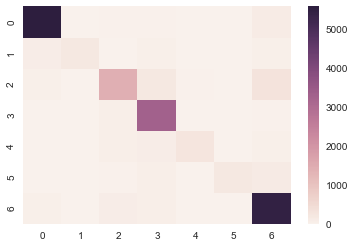

In [106]:
efficiency(attributes)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(attributes, act, test_size=0.25,random_state = 042)

num_features=21 #Change for each of things, put it in a loop
num_activities=7 #For daily sports and activities

x=tf.placeholder(tf.float32,shape=[None,num_features])
y=tf.placeholder(tf.float32,shape=[None,num_activities])

w1=tf.Variable(tf.random_uniform(shape=(num_features,100)))
b1=tf.Variable(tf.zeros(shape=(100,)))
w2=tf.Variable(tf.random_uniform(shape=(100,200)))
b2=tf.Variable(tf.zeros(shape=(200,)))
w3=tf.Variable(tf.random_uniform(shape=(200,7)))
b3=tf.Variable(tf.zeros(shape=(7,)))

h1=tf.add(tf.matmul(x,w1),b1)
h1_act=tf.nn.sigmoid(h1)
h2=tf.add(tf.matmul(h1_act,w2),b2)
h2_act=tf.nn.sigmoid(h2)
out=tf.add(tf.matmul(h2_act,w3),b3)


init=tf.global_variables_initializer()
y_t_1,y_test_1=np_utils.to_categorical(y_train),np_utils.to_categorical(y_test)
y_t_1=y_t_1[:,1:]
y_test_1=y_test_1[:,1:]
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=out,labels=y_t_1))
opzr=tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())
for epochs in xrange(6000):
    _,c=sess.run([opzr,cost],feed_dict={x: X_train, y:y_t_1})
    if epochs%100==0:
        print "Epoch no : "+str(epochs) + "; Loss : "+str(c) 
res=tf.equal(tf.argmax(out,1),tf.argmax(y_test_1,1))
accuracy = tf.reduce_mean(tf.cast(res, "float"))



Epoch no : 0; Loss : 6.73641
Epoch no : 100; Loss : 1.3838
Epoch no : 200; Loss : 1.18977
Epoch no : 300; Loss : 1.1482
Epoch no : 400; Loss : 1.11777
Epoch no : 500; Loss : 1.03939
Epoch no : 600; Loss : 0.971316
Epoch no : 700; Loss : 0.920673
Epoch no : 800; Loss : 0.880186
Epoch no : 900; Loss : 0.845088
Epoch no : 1000; Loss : 0.809774
Epoch no : 1100; Loss : 0.775325
Epoch no : 1200; Loss : 0.742205
Epoch no : 1300; Loss : 0.710154
Epoch no : 1400; Loss : 0.682072
Epoch no : 1500; Loss : 0.656183
Epoch no : 1600; Loss : 0.63212
Epoch no : 1700; Loss : 0.610336
Epoch no : 1800; Loss : 0.592967
Epoch no : 1900; Loss : 0.572432
Epoch no : 2000; Loss : 0.556415
Epoch no : 2100; Loss : 0.541785
Epoch no : 2200; Loss : 0.528355
Epoch no : 2300; Loss : 0.516007
Epoch no : 2400; Loss : 0.504534
Epoch no : 2500; Loss : 0.493847
Epoch no : 2600; Loss : 0.483675
Epoch no : 2700; Loss : 0.473769
Epoch no : 2800; Loss : 0.464523
Epoch no : 2900; Loss : 0.455949
Epoch no : 3000; Loss : 0.44773

In [76]:
print "Accuracy is :  ",accuracy.eval(session=sess,feed_dict={x:X_test,y:y_test_1})


Accuracy is :   0.786868


In [81]:
print "For Extra Trees:"
for feats in [attributes]:
    X_train, X_test, y_train, y_test = train_test_split(attributes, act, test_size=0.25,random_state = 42)
    rf=ExtraTreesClassifier(n_estimators=100,max_features=10,criterion='entropy')
    rf.fit(X_train,y_train)
    t1=time()
    print rf.score(X_test,y_test)
    print "Time Taken : " + str(time()-t1)
    print (classification_report(y_test,rf.predict(X_test),digits=4))
    

For Extra Trees:


/Users/adithya8.0.0/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.901485577966
Time Taken : 0.789015054703
             precision    recall  f1-score   support

        1.0     0.9635    0.9668    0.9652      5790
        2.0     0.8939    0.4944    0.6366       443
        3.0     0.8457    0.7168    0.7760      2080
        4.0     0.8588    0.9616    0.9073      3441
        5.0     0.8845    0.5460    0.6752       533
        6.0     0.8840    0.4712    0.6147       469
        7.0     0.8876    0.9666    0.9254      5688

avg / total     0.9013    0.9015    0.8956     18444

